# Feature Transformation

In this notebook, we'll further look at the ditribution of the features in our data and perform some approprite transformations if needed to better suit our predictor models.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
def read_data(path):
    df = pd.read_excel(path, header=0)

    df.columns = df.iloc[0,:]

    df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

    y = df.Y

    df.drop('ID', inplace=True, axis = 0)
    y.drop('ID', inplace=True, axis = 0)
    df.drop(columns = 'Y', inplace = True)
    df.astype('int32')
    df = df.astype('int32')
    y = y.astype('int32')
    return df,  y

df, y= read_data('../default_of_credit_card_clients.xls')
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


Similar to the ['initial_EDA]('initial_EDA.ipynb') notebook, we'll look at the groups of similar features in our analysis.

Features 'SEX', 'EDUCATION', 'MARRIAGE' do not need to be transformed, as they are categorical features in essence, so the first we'll look at is 'LIMIT_BAL'.

'LIMIT_BAL' skew vale: 0.992866960519544


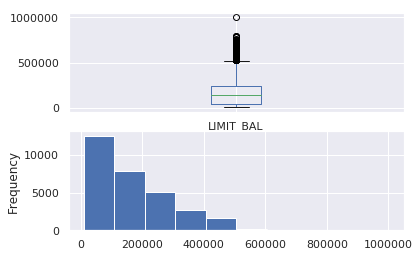

In [8]:
#LIMIT_BAL:

plt.subplot(2,1,1)
df['LIMIT_BAL'].plot(kind='box')

plt.subplot(2,1,2)
df['LIMIT_BAL'].plot(kind = 'hist')

skew = df['LIMIT_BAL'].skew()
print(f"'LIMIT_BAL' skew vale: {skew}")